In [1]:
# Example of multiple variable linear regression using Tensorflow.
# Michael Timbes

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data_frame = np.asarray(pd.read_csv('realestate.csv', sep=','))

In [3]:
def normalize(x):
    """
    Normalizes an input vector.
    """
    mu = np.mean(x)
    st = np.std(x)
    for i in range(len(x)):
        x[i] = ((x[i]-mu)/st)
    return x

In [4]:
# Data Description:
# data_frame[:,0]- MLS# Unique ID
# data_frame[:,1]- Location City, Town
# data_frame[:,2]- Price $
# data_frame[:,3]- # of Bedrooms
# data_frame[:,4]- # of Bathrooms
# data_frame[:,5]- Size in sq. ft.
# data_frame[:,6]- Price/sq.ft.
# data_frame[:,7]- Type of sale: Short Sale, Foreclosure, Regular
#################################################################
#
# Data Preparation
X0 = data_frame[:,3]
X1 = data_frame[:,5]
Ys = data_frame[:,2]
num_tr = len(X0)
# Prep-X
X_tr = np.zeros([num_tr,2])
X_tr[:,0] = normalize(X0)
X_tr[:,1] = normalize(X1)
#X_tr[:,0] = X0
#X_tr[:,1] = X1
print(X_tr.shape)
# Prep-Y
Y_tr = np.zeros([1,num_tr])
Y_tr[0,:] = normalize(Ys)
#Y_tr[0,:] = Ys
yf,yn = Y_tr.shape
Y_tr = np.reshape(Y_tr,(yn,1))
print(Y_tr.shape)
Y_tr, X_tr = np.asmatrix(Y_tr), np.asmatrix(X_tr)

(781, 2)
(781, 1)


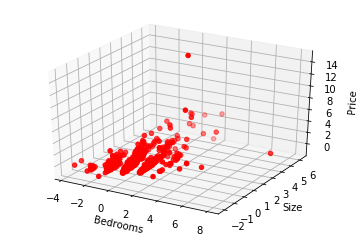

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0,X1,Ys,c='r', marker='o')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Size')
ax.set_zlabel('Price')
plt.show()

In [6]:
# Model
alpha = 0.2
# Theta Values
W = tf.Variable(np.ones([2,1]))
b = tf.Variable(np.ones([1]))
# Input Parameter x
X = tf.placeholder(tf.float64,[None,2])
# Input Parameter y
Y = tf.placeholder(tf.float64,[None,1])

# Linear Model
h = tf.add(tf.matmul(W,X), b)

# Define Cost Variable
cost = tf.reduce_sum(0.5*tf.square(h - Y))/(2*num_tr)
# Define Optimization Object
opt_step = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

In [7]:
# Training Phase
session = tf.InteractiveSession()
session.run(tf.global_variables_initializer())

# Train Loop
for j in range(2):
    for i in range(len(X_tr)):
        session.run(opt_step,{X:X_tr[i,:],Y:Y_tr[i,:]})
c = []
for i in range(len(X_tr)):
    c.append(session.run(h,feed_dict={X:X_tr[i],Y:Y_tr[i]}))
c = np.asarray(c)
print(np.mean(c))

0.453809323992


In [8]:
for j in range(num_tr):
        loss_result = session.run(cost,feed_dict={X:X_tr[j],Y:Y_tr[j]})
W_reg = session.run(W)
b_reg = session.run(b)
print("W = %8.3f, %8.3f "% (W_reg[0],W_reg[1]))
print("B = %8.3f "% (b_reg))
print("Total Loss: %8.3e "% (loss_result))

W =    0.823,    0.823 
B =    0.454 
Total Loss: 2.524e-03 


In [9]:
# Prediction Test
tval = 4
H = session.run(h,feed_dict={X:X_tr[tval]})
#print("Predicted: %8.3f Actual: %8.3f "% (H,Y_tr[tval]))
H = np.asarray(H)
print("Result:",H)

Result: [[ 0.31698344 -0.05489246]
 [ 0.31698344 -0.05489246]]


In [29]:
X_0 = np.arange(1,4)
xf = len(X_0)
sc = 250
mx1 = sc *xf
X_1 = np.arange(1000,1750,250)
Y_01 = np.zeros([len(X_0)])
print(Y_01)
for i in range(len(X_0)):
    res = np.matmul(np.asmatrix(W_reg),np.asmatrix(np.asarray([X_0[i],X_1[i]])))+ np.asmatrix(b_reg)
    print(res)
#Y_01 = np.asarray(Y_01)
print(X_0)
print(X_1)
print(Y_01)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X0,X1,Ys,c='r', marker='o')
#ax.set_xlabel('Bedrooms')
#ax.set_ylabel('Size')
#ax.set_zlabel('Price')
#plt.show()

[ 0.  0.  0.]
[[   1.27713956  823.78404129]
 [   1.27713956  823.78404129]]
[[    2.10046979  1029.61659928]
 [    2.10046979  1029.61659928]]
[[    2.92380002  1235.44915727]
 [    2.92380002  1235.44915727]]
[1 2 3]
[1000 1250 1500]
[ 0.  0.  0.]
